Installing Packages:

In [2]:
import iDEA as idea
import numpy as np
import matplotlib.pyplot as plt

initialising a predefined atom system with two electrons and two protons:

In [3]:
atom=idea.system.systems.atom
print(atom)

iDEA.system.System: x = np.array([-20.000,...,20.000]), dx = 0.1338..., v_ext = np.array([-0.095,...,-0.095]), electrons = ud


Plotting the atom's external potential v_ext(x):

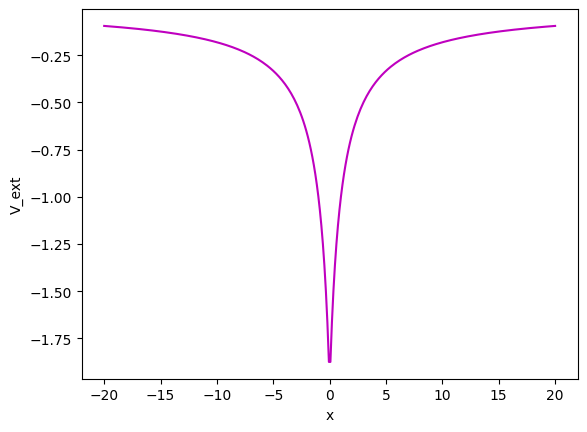

In [12]:
plt.plot(atom.x, atom.v_ext, 'm-')
plt.ylabel("V_ext")
plt.xlabel("x")
plt.show()

finding the exact ground state solution of the electrons:

In [13]:
ground_state = idea.methods.interacting.solve(atom, k=0)

iDEA.methods.interacting.solve: solving eigenproblem...


In [15]:
print(ground_state.space.shape)
print(ground_state.spin.shape)
print(ground_state.full.shape)

(300, 300)
(2, 2)
(300, 2, 300, 2)


calculating charge density observable

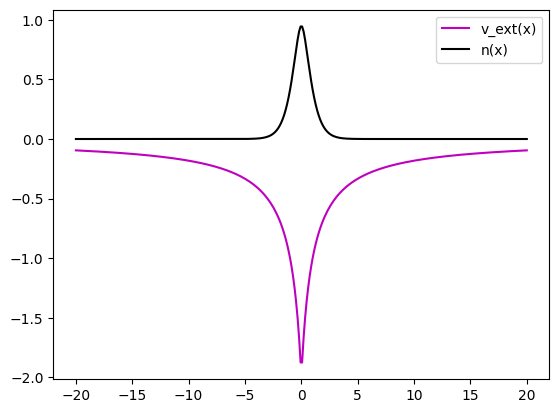

In [16]:
n = idea.observables.density(atom, state=ground_state)

plt.plot(atom.x, atom.v_ext, "m-", label="v_ext(x)")
plt.plot(atom.x, n, "k-", label="n(x)")
plt.legend()
plt.show()

computing the up and down spin densities seperately:

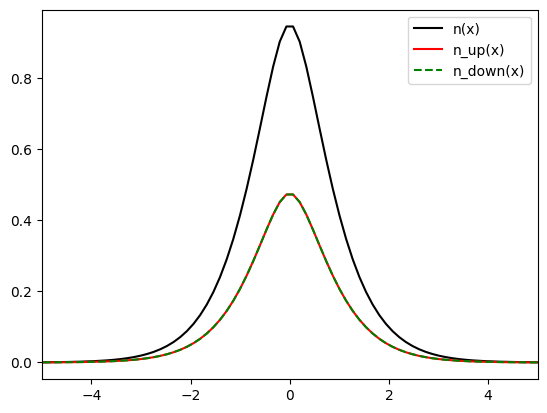

In [18]:
n, up_n, down_n = idea.observables.density(atom, state=ground_state, return_spins=True)
plt.plot(atom.x, n, 'k-', label='n(x)')
plt.plot(atom.x, up_n, 'r-', label='n_up(x)')
plt.plot(atom.x, down_n, 'g--', label='n_down(x)')
plt.xlim([-5.0, 5.0])
plt.legend()
plt.show()

defining a system, s, whihc contains two electrons (both spin up) in a QHO.

In [4]:
#define an x grid from -10 to 10 with 150 points:
x = np.linspace(-10,10,150)
#define external potential, angular freq = 0.25
v_ext = 0.5*(0.25**2)*(x**2)
#choose interaction, for this choose softened.
v_int = idea.interactions.softened_interaction(x)

Build the system:

In [28]:
s = idea.system.System(x,v_ext,v_int,electrons="uu")
s2 = idea.system.System(x,v_ext,v_int,electrons="ud")
print(s)
print(f"number of electrions = {s.count}")

iDEA.system.System: x = np.array([-10.000,...,10.000]), dx = 0.1342..., v_ext = np.array([3.125,...,3.125]), electrons = uu
number of electrions = 2


Plot external potential:

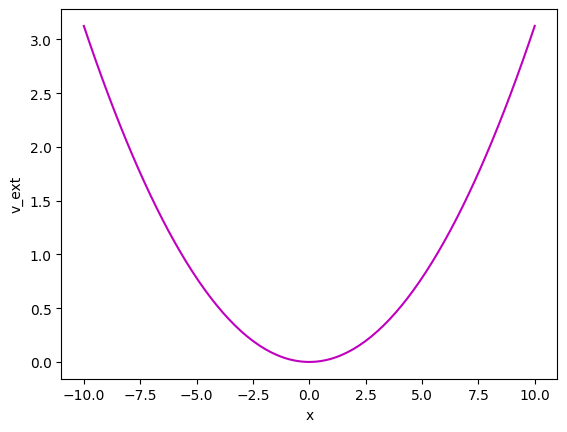

In [11]:
plt.plot(s.x, s.v_ext, "m-")
plt.xlabel("x")
plt.ylabel("v_ext")
plt.show()

plotting the interaction between the electrons:

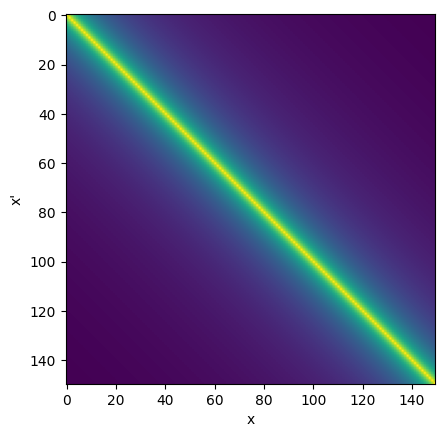

In [16]:
plt.imshow(s.v_int)
plt.xlabel("x")
plt.ylabel("x'")
plt.show()

Solving the schrodinger equation for this system:

In [34]:
ground_state = idea.methods.interacting.solve(s, k=0)
ground_state2 = idea.methods.interacting.solve(s2, k=0)
print(ground_state.space.shape)
print(ground_state.spin.shape)
print(ground_state.full.shape)

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
(150, 150)
(2, 2)
(150, 2, 150, 2)


plot spacial part of the wavefunction:

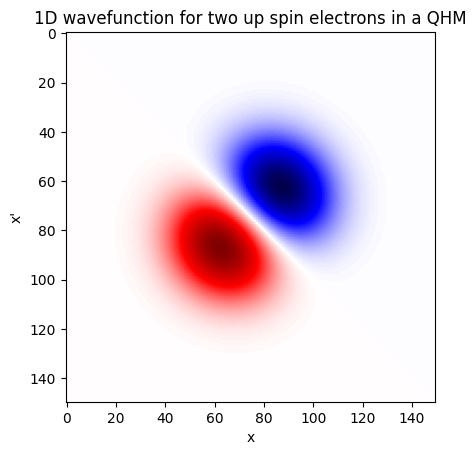

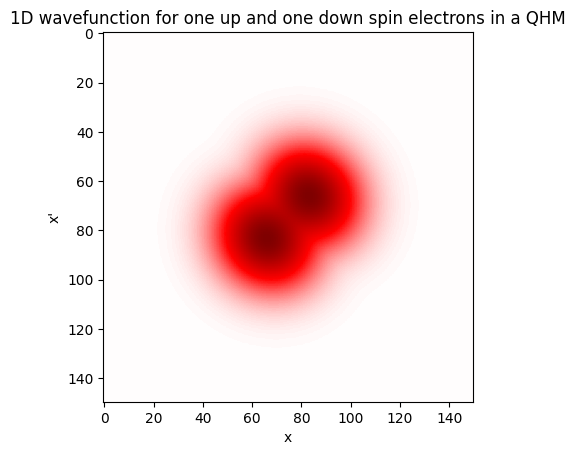

In [36]:
plt.imshow(ground_state.space.real, cmap="seismic", vmax=np.max(ground_state.space.real), vmin=-np.max(ground_state.space.real))
plt.title("1D wavefunction for two up spin electrons in a QHM")
plt.xlabel("x")
plt.ylabel("x'")
plt.show()
plt.imshow(ground_state2.space.real, cmap="seismic", vmax=np.max(ground_state2.space.real), vmin=-np.max(ground_state2.space.real))
plt.title("1D wavefunction for one up and one down spin electrons in a QHM")
plt.xlabel("x")
plt.ylabel("x'")
plt.show()

In [41]:
#test that wavefunctions are antisymmertrised
print(f"uu wavefunction: {np.allclose(ground_state.full.real[80,0,50,0], -ground_state.full.real[50,0,80,0])}")
print(f"ud wavefunction: {np.allclose(ground_state2.full.real[80,0,50,0], -ground_state2.full.real[50,0,80,0])}")

uu wavefunction: True
ud wavefunction: True
